In [1]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white", palette="muted", color_codes=True)

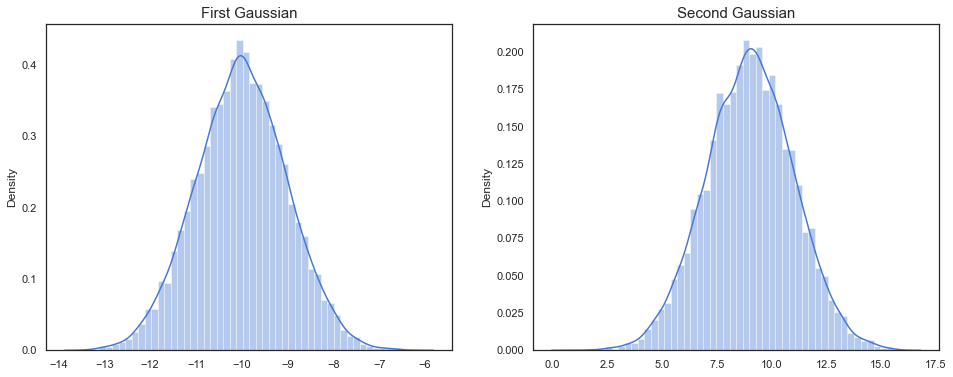

In [2]:
loc1, scale1, loc2, scale2, w1, w2 = -10, 1, 9, 2, 0.5, 0.5

first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(first_gaussian, ax=ax[0])
ax[0].set_title('First Gaussian', fontdict={'fontsize': 15})
# ax[0].set_xlim(0, 20)
sns.distplot(second_gaussian, ax=ax[1])
ax[1].set_title('Second Gaussian', fontdict={'fontsize': 15})
# ax[1].set_xlim(0, 20)
plt.show()


In [3]:
np.concatenate([first_gaussian, second_gaussian]).shape

(20000,)

Text(0.5, 1.0, 'Concatenated Distributions')

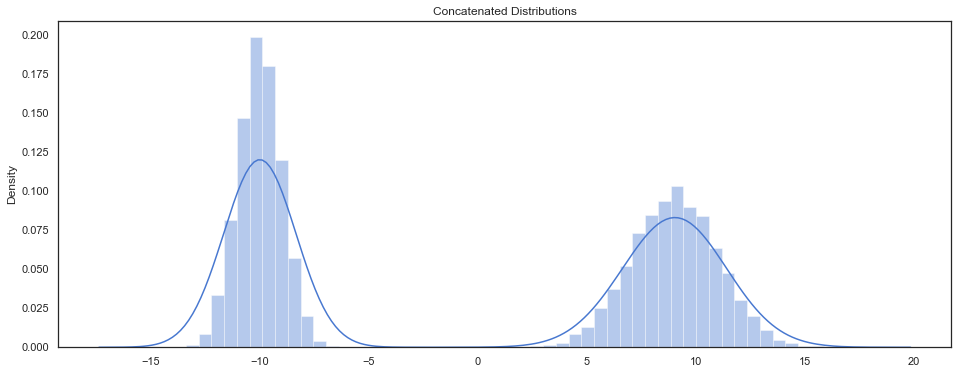

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([first_gaussian, second_gaussian])
sns.distplot(concated_arrays, bins=50)
ax.set_title('Concatenated Distributions')

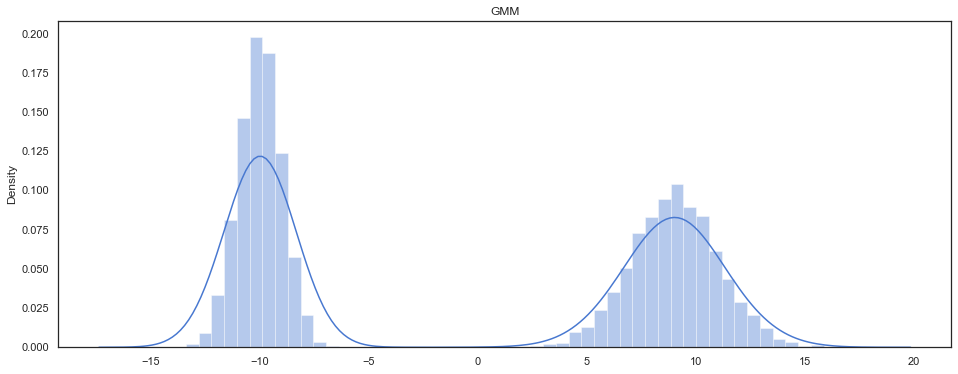

In [5]:
gmm_data = []
for i in range(20000):
    p = stats.uniform.rvs(size=1)
    if p < w1:
        gmm_data.append(np.random.choice(a=first_gaussian, size=1))
    else:
        gmm_data.append(np.random.choice(a=second_gaussian, size=1))
# plot gmm
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(gmm_data, bins=50)
plt.title('GMM')
plt.show()


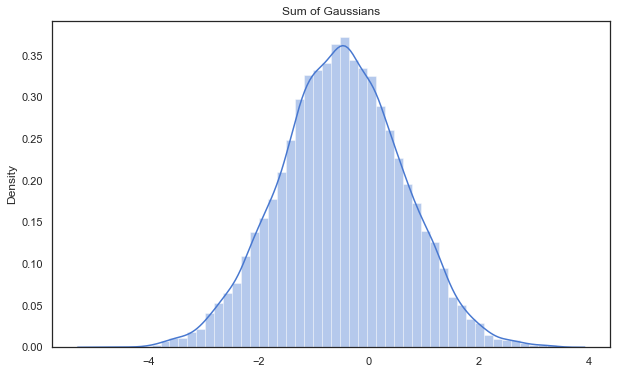

(10000,)


In [6]:
# create sum of gaussians data
data = w1 * first_gaussian + w2 * second_gaussian
# plot sum of gaussians
fig = plt.figure(figsize=(10, 6))
sns.distplot(data, bins=50)
plt.title('Sum of Gaussians')
plt.show()
print(data.shape)

In [7]:
def gmm_vs_2_gaussians(loc1, scale1, loc2, scale2, w1, w2):
    # generate 2 gaussians
    first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
    second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)
    label1 = 'first~N({},{})'.format(loc1,scale1)
    label2 = 'second~N({},{})'.format(loc2,scale2)
    # plotting each one
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.distplot(first_gaussian, ax=ax[0], label=label1)
    ax[0].set_title('First Gaussian', fontdict={'fontsize': 15})
    ax[0].set_xlim(0, 20)
    ax[0].legend()
    sns.distplot(second_gaussian, ax=ax[1],label=label2)
    ax[1].set_title('Second Gaussian', fontdict={'fontsize': 15})
    ax[1].set_xlim(0, 20)
    ax[1].legend()
    plt.show()
    # create the gmm data
    gmm_data = []
    for i in range(10000):
        p = stats.uniform.rvs(size=1)
        if p < w1:
            gmm_data.append(np.random.choice(a=first_gaussian, size=1))
        else:
            gmm_data.append(np.random.choice(a=second_gaussian, size=1))
    # plot gmm
    label_gmm = 'f(x)={}*N({},{})+{}*N({},{})'.format(w1,loc1,scale1,w2,loc2,scale2)
    fig = plt.figure(figsize=(10, 6))
    sns.distplot(gmm_data, bins=50,label=label_gmm)
    plt.title('GMM')
    plt.legend()
    plt.show()
    # create sum of gaussians data
    data = w1 * first_gaussian + w2 * second_gaussian
    # plot sum of gaussians
    label_sum = 'sum~N({},{})'.format(loc1+loc2,scale1+scale2)
    fig = plt.figure(figsize=(10, 6))
    sns.distplot(data, bins=50,label=label_sum)
    plt.title('Sum of Gaussians')
    plt.legend()
    plt.show()
    
    # Mean calculations
    # each gaussian
    print('Gaussians means:')
    print(np.mean(first_gaussian))
    print(np.mean(second_gaussian))
    print('-'*20)
    # sum of gaussians
    print('Sum of Gaussians mean:')
    print('data: {:.2f}'.format(np.mean(data)))
    print('formula: {:.2f}'.format(w1*np.mean(first_gaussian) + w2*np.mean(second_gaussian)))
    print('theoretical formula: {:.2f}'.format(w1*loc1 + w2*loc2))
    print('-'*20)
    # gmm
    print('GMM mean:')
    print('data: {:.2f}'.format(np.mean(gmm_data)))
    print('formula: {:.2f}'.format(w1*np.mean(first_gaussian) + w2*np.mean(second_gaussian)))
    print('theoretical formula: {:.2f}'.format(w1*loc1 + w2*loc2))
    print()
    print()
    
    # Variance calculations
    # each gaussian
    print('Gaussians variances:')
    print(np.var(first_gaussian))
    print(np.var(second_gaussian))
    print('-'*20)
    # sum of gaussians
    print('Sum of Gaussians variance:')
    print('data: {:.2f}'.format(np.var(data)))
    print('formula: {:.2f}'.format(np.power(w1,2)*np.var(first_gaussian) + 
          np.power(w2,2)*np.var(second_gaussian)))
    print('theoretical formula: {:.2f}'.format(np.power(w1,2)*np.power(scale1,2) + 
                                               np.power(w2,2)*np.power(scale2,2)))
    print('-'*20)
    
    
    
    
    # gmm
    print('GMM variance:')
    print('data: {:.2f}'.format(np.var(gmm_data)))
    print('formula: {:.2f}'.format(w1*np.var(first_gaussian) + w2*np.var(second_gaussian) +
          w1*(np.power((np.mean(first_gaussian) - np.mean(gmm_data)), 2)) + 
          w2*(np.power((np.mean(second_gaussian) - np.mean(gmm_data)), 2))))
    print('theoretical formula: {:.2f}'.format(w1*np.power(scale1,2) + w2*np.power(scale2,2) +
          w1*(np.power((loc1 - (w1*loc1 + w2*loc2)), 2)) + 
          w2*(np.power((loc2 - (w1*loc1 + w2*loc2)), 2))))

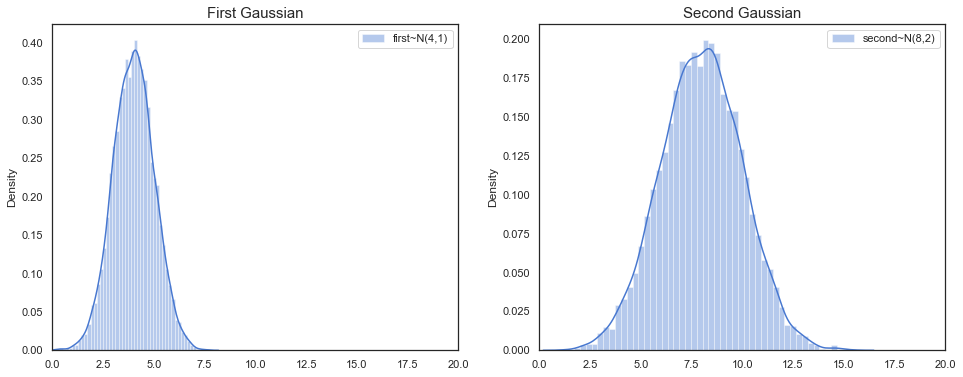

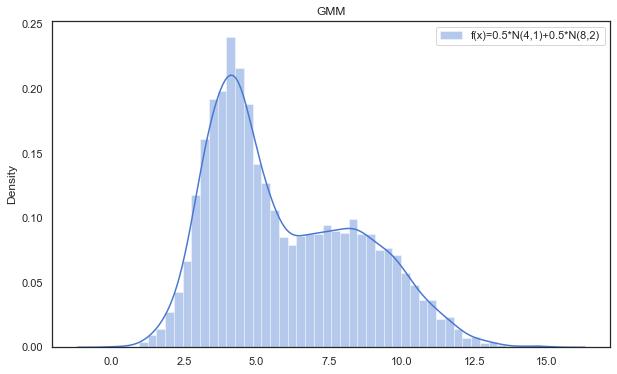

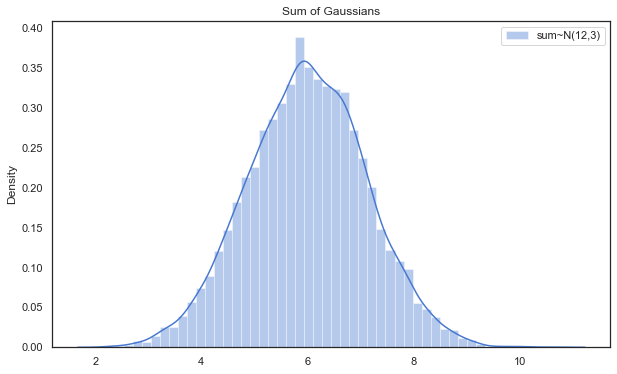

Gaussians means:
4.006752419337739
7.990220379008628
--------------------
Sum of Gaussians mean:
data: 6.00
formula: 6.00
theoretical formula: 6.00
--------------------
GMM mean:
data: 5.96
formula: 6.00
theoretical formula: 6.00


Gaussians variances:
1.0199154825349783
3.9958203626998183
--------------------
Sum of Gaussians variance:
data: 1.25
formula: 1.25
theoretical formula: 1.25
--------------------
GMM variance:
data: 6.49
formula: 6.48
theoretical formula: 6.50


In [8]:
gmm_vs_2_gaussians(4, 1, 8, 2, 0.5, 0.5)

In [ ]:
gmm_vs_2_gaussians(2, 1, 10, 2, 0.5, 0.5)